# The Heat Equation

## A few theoretical remarks
Heat propagation is described by the differential equation (for a one-dimensional system)
$$\frac{\partial T(x,t)}{\partial t} = \frac{k}{C \rho} \frac{\partial^2 T(x,t)}{\partial x^2},$$
which describes the variation of temperature ($T$) as a function of a coordinate ($x$) and time ($t$).  $k$ is the thermal conductivity, $C$ is the heat capacity and $\rho$ the density of a material.

An analytical solution can be found by separating the variables $x$ and $t$
$$T(x,t)=X(x)\cal{T} (t)$$
Substituting into the original equation, we can rewrite this as two non-coupled ordinary differential equations (ODE) as a function of the $t$ and $x$ variables.
$$\frac{d \cal{T}}{dt} (t) + \alpha^2 \frac{k}{C \rho} {\cal T}(t) = 0, \ \ \ \ \frac{d^2 X}{d x^2}(x) + \alpha^2 X(x)=0,$$
where $\alpha$ is a real number. These are ordinary differential equations, the solutions can be found for set values of $\alpha$. When multiple values of $\alpha$ are allowed, the corresponding solutions need to be added up.

For this project we consider a bar of length $L=0.3$ m with the boundary conditions $T(0,t)=T(L,t)=0$ C, e.g. with the two edges kept at a constant temperature of 0 C. We also assume the initial condition $T(x,0)=T_0=100$C for $0<x<L$. 

The boundary condition requires a solution for $X(x)$ of the type:
$$X(x)=\sin \alpha_n x \ \ \mbox{with} \ \ \alpha_n=n \pi/L$$
Consequently the solution for $\cal{T}(t)$ is written in the form:
$${\cal T}(t)=\exp{\left( -\frac{\alpha_n^2 kt}{C \rho} \right) } $$
Which leads to the generic solution
$$T(x,t) = \sum_{n=1}^{\infty} A_n \sin (\alpha_n x) \exp{\left( -\frac{\alpha_n^2 kt}{C \rho} \right) }, $$

To satisfy the initial condition, we can derive the factors $A_n$ of the Fourier serie and write the analytical solution as
$$T(x,t) = \sum_{n=1, 3, 5, ...}^{\infty} \frac{4T_0}{n \pi} \sin (\alpha_n x) \exp{\left( -\frac{\alpha_n^2 kt}{C \rho} \right) }, $$


In your numerical implementation use Aluminium as a metal with heat conductivity $k=220$ W/(m K), density $\rho=2700$ kg/m$^3$ and specific heat $C=900$ J/(kg K). 




## Question 1: Sum the members of the series
**(8 marks)**

The analytical solution is presented as an infinite serie of terms. Write code to calculate the n-th term of the serie as a function of $x$ and $t$. 
- Plot two graphs, each with the first three terms of the serie (n=1,3,5), for t=0s and t=20s. Comment on the results
- Add the first 50 terms (up to $n=99$) of the serie and plot a graph of $T(x,t)$ for t=0, 20, 100 s. If enough points are used in the $x$ coordinate a ripple is visible in the graph for $t=0$ s. Explain this. 
- Produce a 3D plot showing $T(x,t)$ for t up to 100 s, when adding the first 50 terms. Plot as a wireframe and as a colour temperature map

EXERCISE 1

PART 1


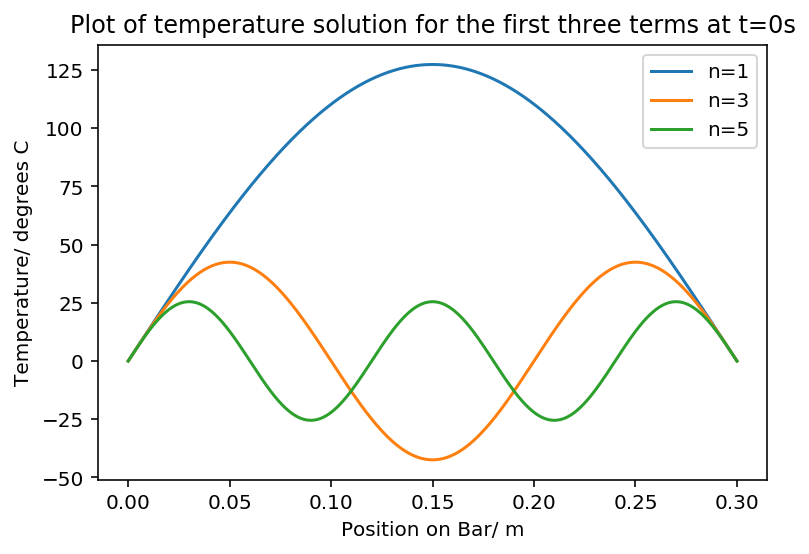

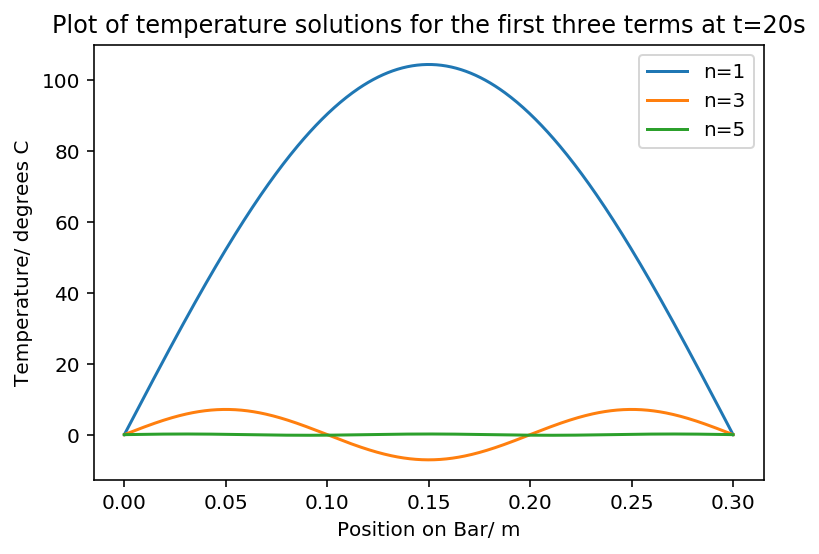

Comments: As time progresses the temperature amplitudes for all three values of n significantly decrease, especially for higher values of n which shows that higher terms have a decreasing effect on the temperature solution as time passes.

PART 2


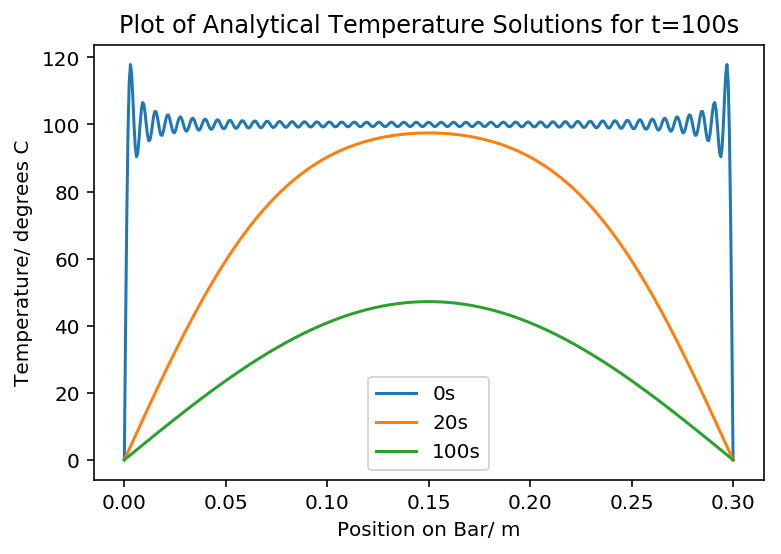

Comments: At t=0 we see a ripple as the ends of the rod meet the T=0 degree medium. This is a demonstration of the Gibbs overshoot, which occurs in Fourier series with a ﬁnite number of terms, which are used to represent a discontinuous function.

PART 3


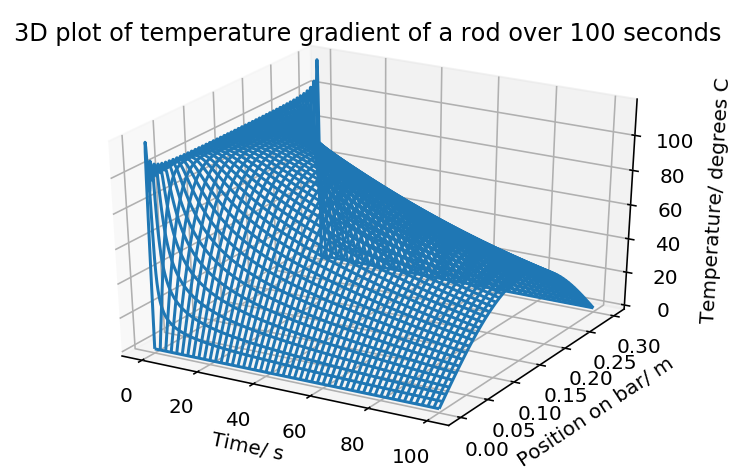

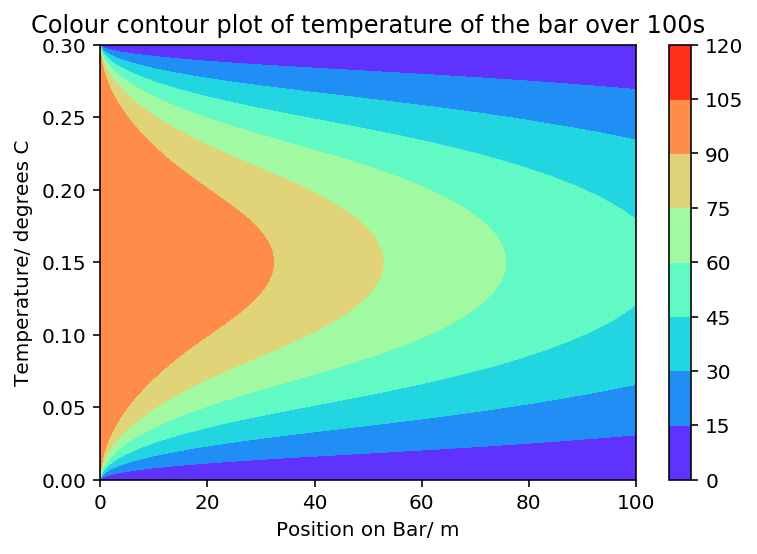

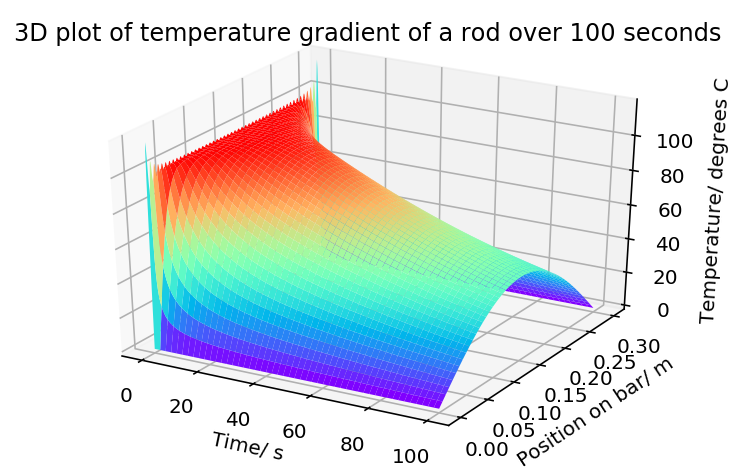

In [25]:
# ASSESSED CODE REDACTED

## Question 2: Numerical solution
**(8 marks) **

A solution can be found numerically using time steps with the so-called "leap frog" method. To do this we replace the derivative in time with the approximation
$$\frac{\partial T(x,t)}{\partial t} = \frac{T(x,t+\Delta t)-T(x,t)}{\Delta t} + ...$$
To approximate the second derivative over $x$ we write
$$T(x+\Delta x,t ) = T(x,t) + \frac{\partial T(x,t)}{\partial x} \Delta x + \frac{1}{2} \frac{\partial^2 T(x,t)}{\partial x^2} (\Delta x)^2+...$$
$$T(x-\Delta x,t ) = T(x,t) - \frac{\partial T(x,t)}{\partial x} \Delta x + \frac{1}{2} \frac{\partial^2 T(x,t)}{\partial x^2} (\Delta x)^2+...$$
Adding the two terms and solving for the second derivative we obtain
$$\frac{\partial^2 T(x,t)}{\partial x^2} = \frac{1}{\Delta x^2} \left[T(x+\Delta x)+T(x-\Delta x)-2T(x,t) \right]$$
Substituting both approximations in the heat equations
$$\frac{T(x,t+\Delta t)-T(x,t)}{\Delta t} = \frac{k}{c \rho} \frac{1}{\Delta x^2} \left[T(x+\Delta x)+T(x-\Delta x)-2T(x,t) \right]$$
By which we get
$$T(x,t+\Delta t)=T(x,t) + \eta \left[ T(x+\Delta x)+T(x-\Delta x)-2T(x,t) \right] \ \ \ , \ \eta=\frac{k \Delta t}{c \rho \Delta x^2} $$
Thus we can evaluate the value of $T(x,t+\Delta t)$ once the value of $T(x,t)$ is known. The numerical method will consist in starting with the given initial condition at $t=0$ and propagate that forward in time, hence the name of "leap frog".

Create a matrix of points $T_{i,j}$ with intervals $\Delta t$ and $\Delta x$ and solve the equation using the leapfrog method:
$$T_{i,j+1}=T_{i,j} + \eta \left[T_{i+1,j}+T_{i-1,j}-2T_{i,j} \right], \ \ \ \eta=\frac{k\Delta t}{C \rho \Delta x^2}$$
Where we have indicated $x=i \Delta x$ and $t=j \Delta t$. For this exercise use $\Delta x=0.01$m and $\Delta t=0.5$s 
- Plot T(x,t) for t=0, 20, 100s and compare with the plot in Exercise 1
- Repeat the 3-D $T(x,t)$ wireframe plot of Exercise 1. 
- Plot the differences between this result and the truncated serie from Exercise 1 for $t=20$ and 100s

(you should use numpy arrays to save the $T_{i,j}$ array as you go along)

EXERCISE 2
PART 1


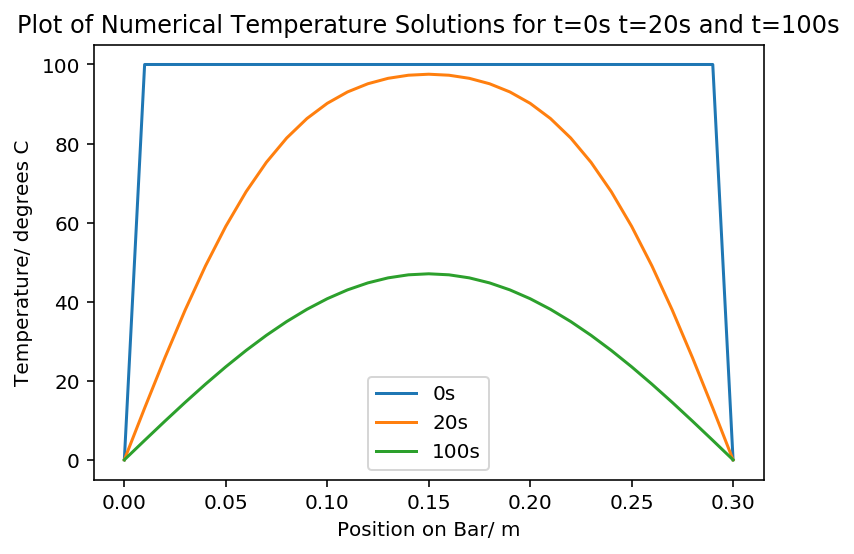

Comments: Here the numerical solutions look similar to the analytical soltions, however we do not see the Gibbs overshoot for t=0s. We can see that the numerical solution is a valid approximation for these values of time and distance incriment

PART 2


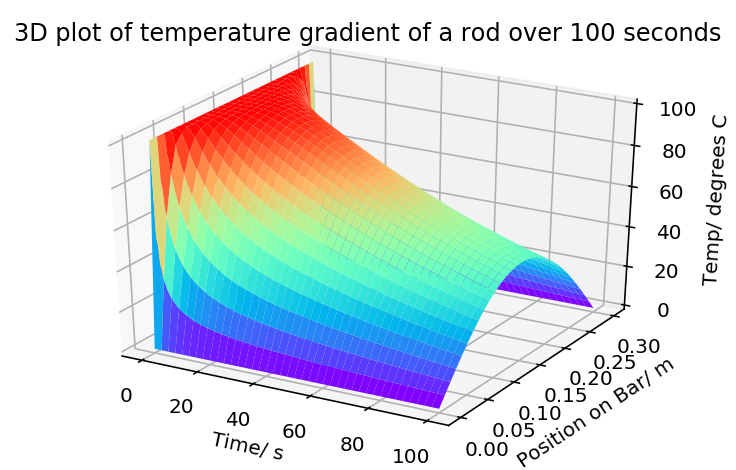

PART 3


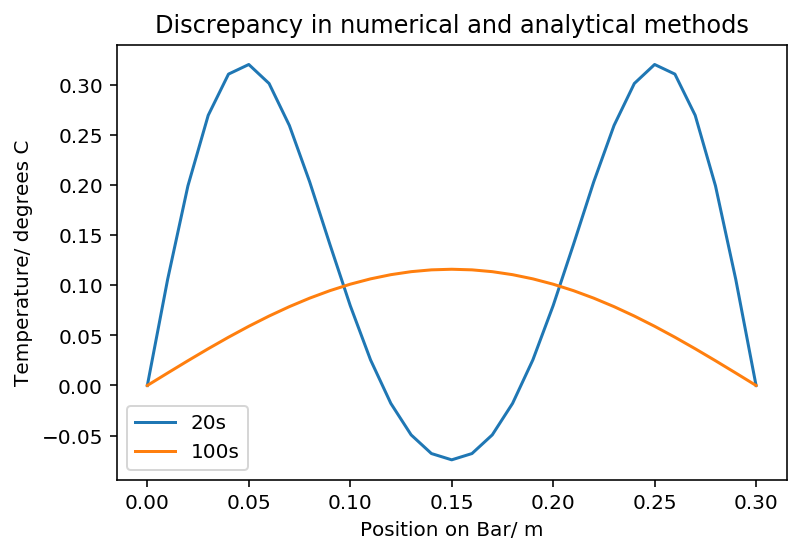

Comments: We can see that the difference between the two methods decreases as time passes. We also see that the shapes of the two methods are initially very different, but show a more similar solution as time passess.


In [26]:
# ASSESSED CODE REDACTED

## Question 3: Stability study
**(4 marks)**

In this section we evaluate how the quality of our solution depends on the choice of $\Delta x$ and $\Delta t$. 
- Fix $\Delta x = 0.01$ m and change the value of $\Delta t$ to 0.2 s and 1 s. Compare the results with those obtained in exercise 2. 
- Fix $\Delta t = 0.5$ s and change the value of $\Delta x$ to 0.02 m and 0.005 m. Compare the results with those obtained in exercise 2.

When showing your comparisons, plot the difference between the solution in Exercise 1 and what you obtain here.

Next week, I will show you how the solution is expected to be stable only if $\eta < 0.5$. Comment on the results you obtained


EXERCISE 3


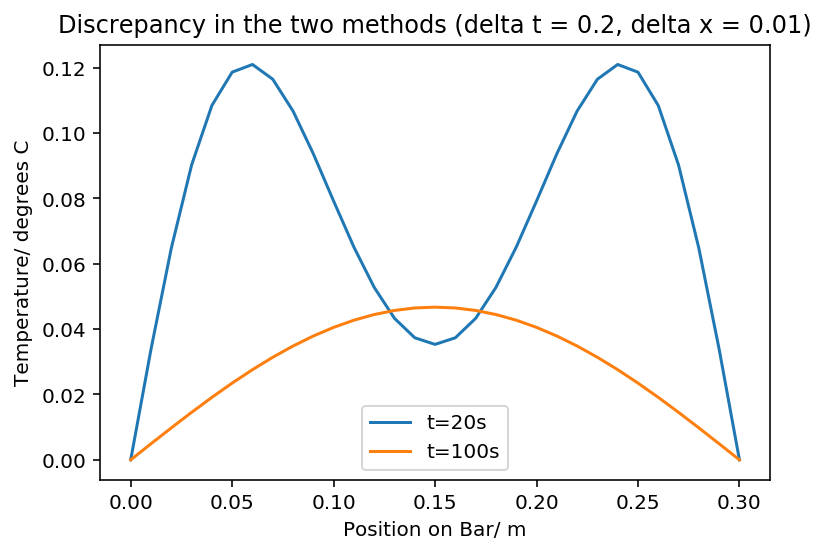

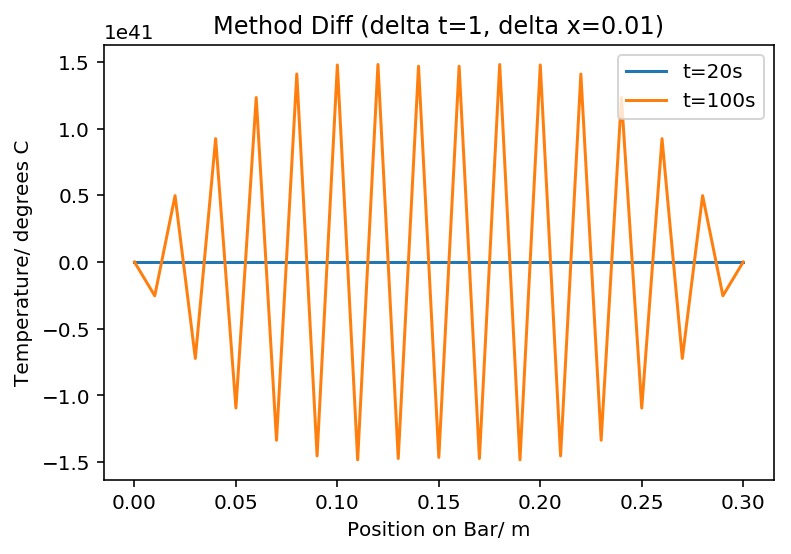

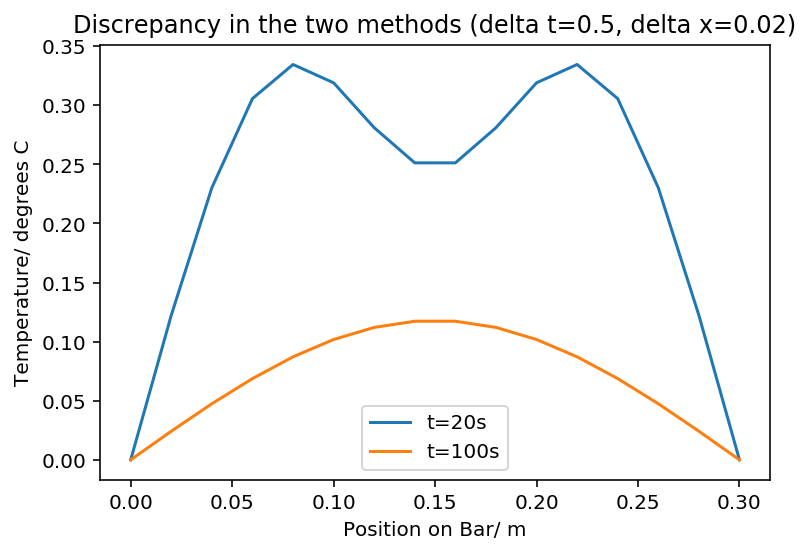

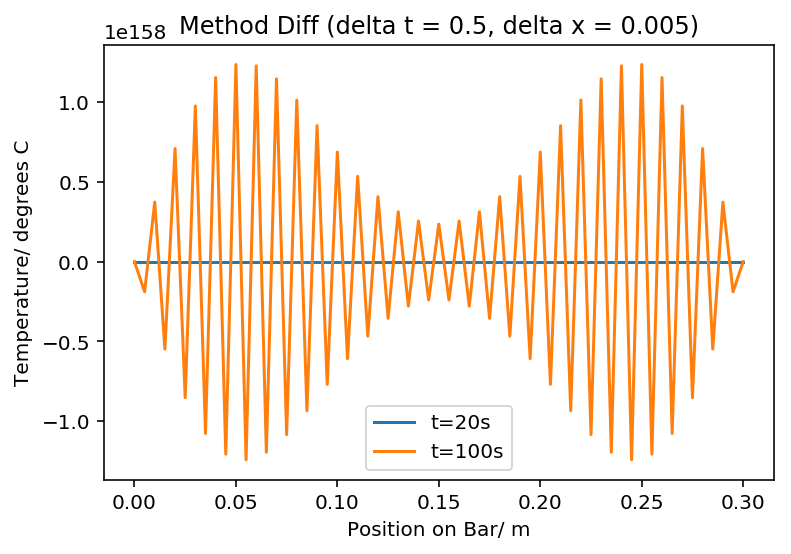

Comments: The second and fourth graphs demonstrate time and distance intervals of unstable solutions. The first and third graphs show stable solutions. This is demonstrated by the fact that the first and third graphs look similar to that in exercise 2. This shows that the stability of a solution depends on the incriments of time and displacement which are put into the numerical method, this is because the value of Eta must be less than 0.5 to find a stable solution which mimics the real world situation.


In [27]:
# ASSESSED CODE REDACTED

## Question 4: Sinusoidal initial distribution
**(5 marks)**

A comparison between the numerical solution (via the leap-frog method) and analytical solution (truncated series) is difficult, as it is difficult to estabilish the approximations made for both of them. To gain better numerical insight on the numerical solutions, we repeat the simulations for a case where the exact solution is known, eg the case when the initial condition is given by
$$T(x,0)=T_0 \sin (x\pi/L)$$
In this case only the first term of the serie will be different from zero and the analytical solution does not involve any summation
$$T(x,t)=T_0 \sin (x\pi/L) \exp{\left( -\frac{\pi^2 kt}{L^2 C \rho} \right) }$$
- Repeat the numerical solution with this initial condition and compare the results obtained with the leap-frog method and $\Delta t= 0.5$s, $\Delta x$=0.01m


EXERCISE 4


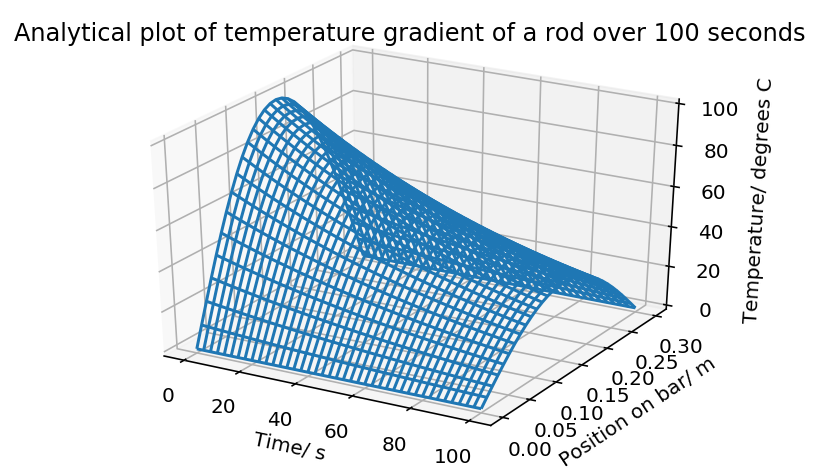

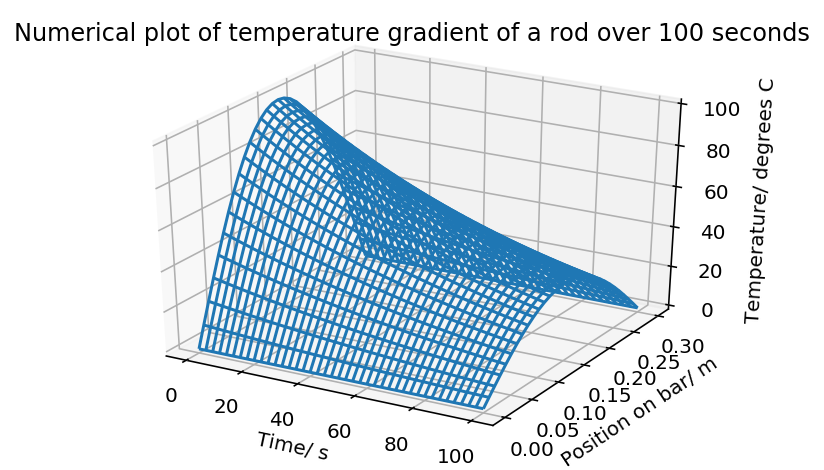

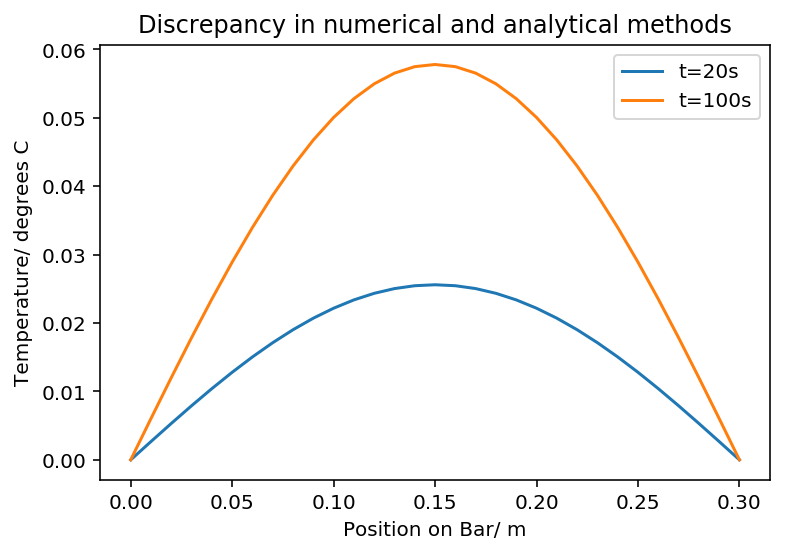

Graph shows solutions for sinusoidal initial conditions 

Comments: The discrepancy in temperatures here are smaller than for the previous initial conditions after the same cooling time.
Here the analytical plot shows an exact trend of the heat distribution, and the numerical (leap) method gives a good apporximation (here we see that they are within 0.06 degrees of each other) to the trend.


In [29]:
# ASSESSED CODE REDACTED